In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pes-ec-mi-competition-a/sample_submission.csv
/kaggle/input/pes-ec-mi-competition-a/train.csv
/kaggle/input/pes-ec-mi-competition-a/test.csv


In [2]:
dataset=pd.read_csv("/kaggle/input/pes-ec-mi-competition-a/train.csv")
df=dataset.drop(columns=["filename","length"])


In [3]:
X=dataset.drop(columns=["length","filename","label"])
y=dataset['label']
X

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.464264,0.079744,0.228116,0.007791,2156.231325,3.334553e+05,2295.327890,301528.295866,4463.253268,2.718348e+06,...,2.309055,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688
1,0.254604,0.090115,0.075960,0.002236,1439.715643,6.895570e+04,1532.279764,78968.523547,2657.114446,5.030357e+05,...,-1.096684,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949
2,0.488070,0.065943,0.119709,0.001558,2049.831819,1.320308e+05,2043.472368,71699.726714,4320.802847,6.807394e+05,...,4.933163,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089
3,0.440747,0.071972,0.108535,0.001491,2237.056815,1.298620e+05,2070.706749,62747.206984,4502.841233,5.672063e+05,...,3.557746,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505
4,0.369718,0.090648,0.052010,0.000124,1775.591113,6.664517e+04,2351.155395,51753.800714,4473.191669,9.175494e+05,...,13.952731,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,0.462670,0.095231,0.193568,0.019747,2347.298046,1.844716e+06,2726.496978,230626.501970,5050.944073,6.349233e+06,...,-3.061960,30.122299,-0.610546,35.591270,-2.011291,41.289818,-2.381295,26.049856,-6.093438,23.417213
8987,0.173276,0.085205,0.024984,0.000277,845.785117,1.655318e+04,1396.738918,95543.330422,885.511569,5.487828e+04,...,-13.784028,39.011562,-12.885547,20.443741,-6.172429,30.038237,-3.897101,64.039413,-8.887048,40.697903
8988,0.291293,0.088386,0.149195,0.001361,2579.336949,6.288279e+05,2714.346339,110427.695082,5024.358849,2.866467e+06,...,7.091562,74.335464,-10.504237,106.257889,-5.624926,37.167961,5.237616,29.307474,-6.440866,70.347389
8989,0.249859,0.089284,0.130065,0.003803,1230.642086,1.891168e+05,1800.824216,65413.553514,2491.971342,9.259276e+05,...,-1.363668,39.797985,-9.799487,42.763683,-6.866515,57.569805,-5.379220,70.344284,-7.938619,81.895149


In [4]:

from sklearn.preprocessing import StandardScaler,Normalizer

std_scaler = StandardScaler()
features_scaled = std_scaler.fit_transform(X.dropna()) 
dataset

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,pop.00072.5.wav,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,3.334553e+05,2295.327890,301528.295866,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,pop
1,jazz.00038.9.wav,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,6.895570e+04,1532.279764,78968.523547,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,jazz
2,disco.00055.3.wav,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,1.320308e+05,2043.472368,71699.726714,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,disco
3,rock.00025.9.wav,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,1.298620e+05,2070.706749,62747.206984,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,rock
4,jazz.00013.4.wav,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,6.664517e+04,2351.155395,51753.800714,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,jazz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,hiphop.00065.4.wav,66149,0.462670,0.095231,0.193568,0.019747,2347.298046,1.844716e+06,2726.496978,230626.501970,...,30.122299,-0.610546,35.591270,-2.011291,41.289818,-2.381295,26.049856,-6.093438,23.417213,hiphop
8987,classical.00065.4.wav,66149,0.173276,0.085205,0.024984,0.000277,845.785117,1.655318e+04,1396.738918,95543.330422,...,39.011562,-12.885547,20.443741,-6.172429,30.038237,-3.897101,64.039413,-8.887048,40.697903,classical
8988,country.00044.3.wav,66149,0.291293,0.088386,0.149195,0.001361,2579.336949,6.288279e+05,2714.346339,110427.695082,...,74.335464,-10.504237,106.257889,-5.624926,37.167961,5.237616,29.307474,-6.440866,70.347389,country
8989,blues.00013.3.wav,66149,0.249859,0.089284,0.130065,0.003803,1230.642086,1.891168e+05,1800.824216,65413.553514,...,39.797985,-9.799487,42.763683,-6.866515,57.569805,-5.379220,70.344284,-7.938619,81.895149,blues


In [5]:
import pandas as pd

# import data


from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()
df['label']= df['label'].replace({'blues':0,
'classical':1,
'country':2,
'disco':3,
'hiphop':4,
'jazz':5,
'metal':6,
'pop':7,
'reggae':8,
'rock':9})





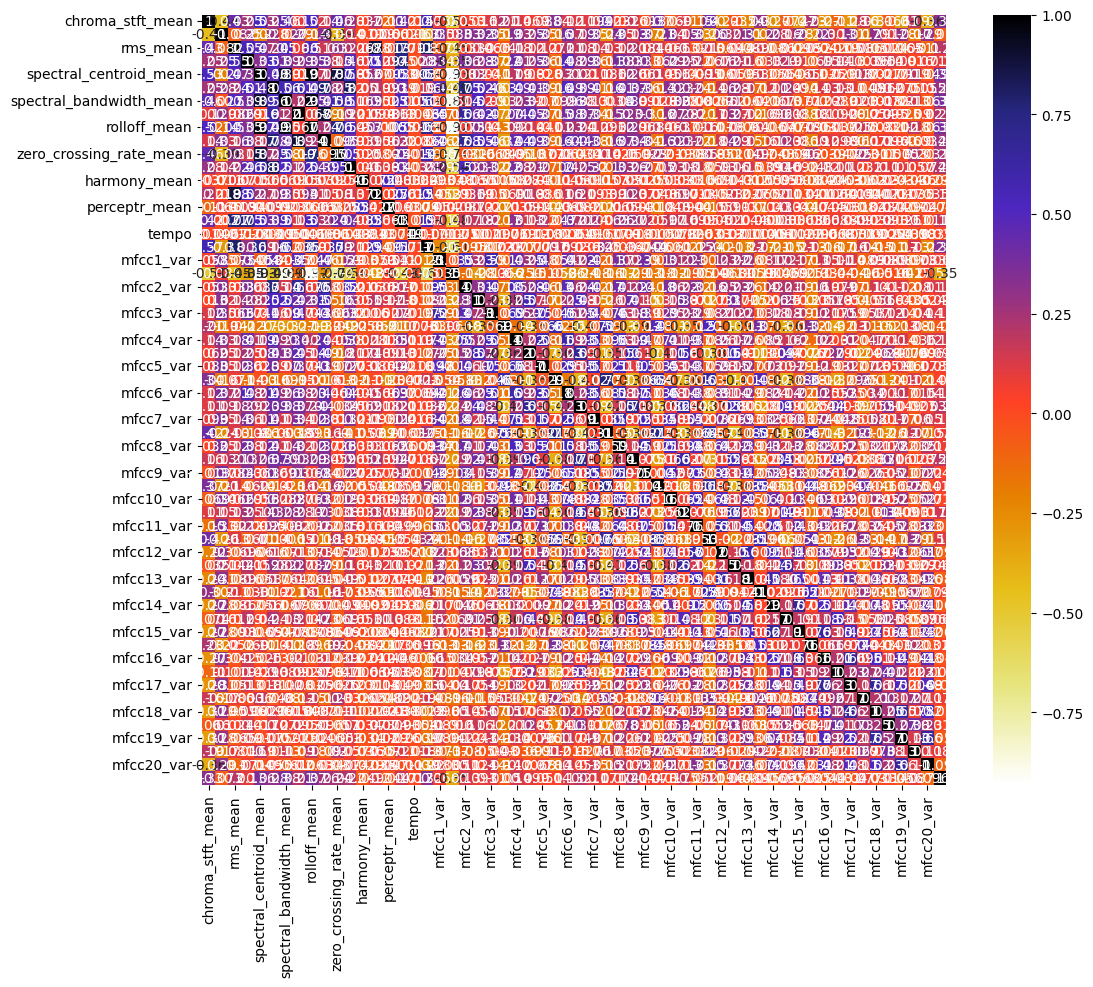

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()

<Axes: >

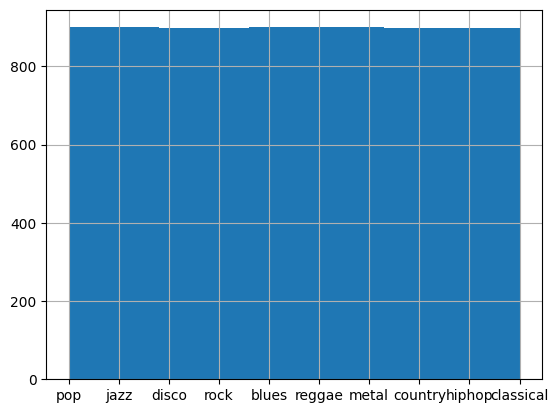

In [7]:
y.hist()

In [8]:
df['label']= df['label'].replace({'blues':0,
'classical':1,
'country':2,
'disco':3,
'hiphop':4,
'jazz':5,
'metal':6,
'pop':7,
'reggae':8,
'rock':9})

In [9]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr  

In [10]:
corr_features = correlation(X, 0.85)
corr_features

{'harmony_var',
 'mfcc2_mean',
 'rolloff_mean',
 'rolloff_var',
 'spectral_bandwidth_mean',
 'zero_crossing_rate_mean'}

In [11]:
features=list(corr_features)
newd=df.drop(columns=features)
newd

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_var,zero_crossing_rate_var,harmony_mean,perceptr_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.464264,0.079744,0.228116,0.007791,2156.231325,3.334553e+05,301528.295866,0.000646,0.000033,-0.000009,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,7
1,0.254604,0.090115,0.075960,0.002236,1439.715643,6.895570e+04,78968.523547,0.000364,-0.001158,-0.000681,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,5
2,0.488070,0.065943,0.119709,0.001558,2049.831819,1.320308e+05,71699.726714,0.000814,0.014019,0.006819,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,3
3,0.440747,0.071972,0.108535,0.001491,2237.056815,1.298620e+05,62747.206984,0.000961,-0.000083,-0.000934,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,9
4,0.369718,0.090648,0.052010,0.000124,1775.591113,6.664517e+04,51753.800714,0.000258,0.000008,0.000497,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,0.462670,0.095231,0.193568,0.019747,2347.298046,1.844716e+06,230626.501970,0.008181,-0.000020,-0.000399,...,30.122299,-0.610546,35.591270,-2.011291,41.289818,-2.381295,26.049856,-6.093438,23.417213,4
8987,0.173276,0.085205,0.024984,0.000277,845.785117,1.655318e+04,95543.330422,0.000291,-0.001755,-0.000086,...,39.011562,-12.885547,20.443741,-6.172429,30.038237,-3.897101,64.039413,-8.887048,40.697903,1
8988,0.291293,0.088386,0.149195,0.001361,2579.336949,6.288279e+05,110427.695082,0.002352,-0.000053,-0.000650,...,74.335464,-10.504237,106.257889,-5.624926,37.167961,5.237616,29.307474,-6.440866,70.347389,2
8989,0.249859,0.089284,0.130065,0.003803,1230.642086,1.891168e+05,65413.553514,0.001575,0.000006,-0.000099,...,39.797985,-9.799487,42.763683,-6.866515,57.569805,-5.379220,70.344284,-7.938619,81.895149,0


In [12]:
df.info

<bound method DataFrame.info of       chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0             0.464264         0.079744  0.228116  0.007791   
1             0.254604         0.090115  0.075960  0.002236   
2             0.488070         0.065943  0.119709  0.001558   
3             0.440747         0.071972  0.108535  0.001491   
4             0.369718         0.090648  0.052010  0.000124   
...                ...              ...       ...       ...   
8986          0.462670         0.095231  0.193568  0.019747   
8987          0.173276         0.085205  0.024984  0.000277   
8988          0.291293         0.088386  0.149195  0.001361   
8989          0.249859         0.089284  0.130065  0.003803   
8990          0.332883         0.092598  0.100225  0.001413   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                2156.231325           3.334553e+05              2295.327890   
1                1439.715643           6.895570e+04

In [13]:
df.isnull().sum()

chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var                  0
mfcc9_mean                 0
mfcc9_var     

In [14]:
dataset.isnull().sum()

filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [15]:
dataset.shape

(8991, 60)

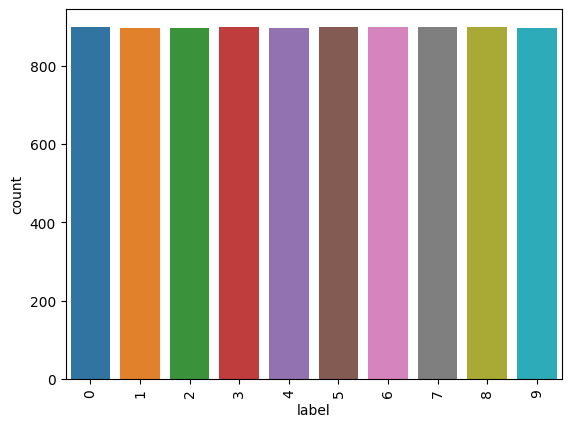

In [16]:
sns.countplot(x=df.label) # plot the categories
plt.xticks(rotation=90);

In [17]:
df=dataset.drop(labels='filename',axis=1)
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,333455.342337,2295.327890,301528.295866,4463.253268,...,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688,pop
1,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,68955.697954,1532.279764,78968.523547,2657.114446,...,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949,jazz
2,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,132030.817465,2043.472368,71699.726714,4320.802847,...,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089,disco
3,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,129862.001264,2070.706749,62747.206984,4502.841233,...,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505,rock
4,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,66645.168399,2351.155395,51753.800714,4473.191669,...,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722,jazz


In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

In [19]:
data = df.iloc[:, :-1] # get the other columns
data

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,66149,0.464264,0.079744,0.228116,0.007791,2156.231325,3.334553e+05,2295.327890,301528.295866,4463.253268,...,2.309055,36.512493,0.587634,44.336262,3.168914,31.690376,0.719836,50.416603,-3.192938,25.115688
1,66149,0.254604,0.090115,0.075960,0.002236,1439.715643,6.895570e+04,1532.279764,78968.523547,2657.114446,...,-1.096684,29.887444,-0.706779,105.123726,2.879812,157.346725,3.201282,71.674042,-1.664307,53.640949
2,66149,0.488070,0.065943,0.119709,0.001558,2049.831819,1.320308e+05,2043.472368,71699.726714,4320.802847,...,4.933163,29.158789,-4.570374,24.995367,-0.735507,33.519482,-2.301054,38.444759,6.482006,50.393089
3,66149,0.440747,0.071972,0.108535,0.001491,2237.056815,1.298620e+05,2070.706749,62747.206984,4502.841233,...,3.557746,33.833458,-5.574619,29.497013,3.903063,18.930311,-2.205716,26.832264,0.551784,25.199505
4,66149,0.369718,0.090648,0.052010,0.000124,1775.591113,6.664517e+04,2351.155395,51753.800714,4473.191669,...,13.952731,48.042686,-3.686353,47.710155,3.593751,70.004326,0.011506,85.980957,1.892704,108.339722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8986,66149,0.462670,0.095231,0.193568,0.019747,2347.298046,1.844716e+06,2726.496978,230626.501970,5050.944073,...,-3.061960,30.122299,-0.610546,35.591270,-2.011291,41.289818,-2.381295,26.049856,-6.093438,23.417213
8987,66149,0.173276,0.085205,0.024984,0.000277,845.785117,1.655318e+04,1396.738918,95543.330422,885.511569,...,-13.784028,39.011562,-12.885547,20.443741,-6.172429,30.038237,-3.897101,64.039413,-8.887048,40.697903
8988,66149,0.291293,0.088386,0.149195,0.001361,2579.336949,6.288279e+05,2714.346339,110427.695082,5024.358849,...,7.091562,74.335464,-10.504237,106.257889,-5.624926,37.167961,5.237616,29.307474,-6.440866,70.347389
8989,66149,0.249859,0.089284,0.130065,0.003803,1230.642086,1.891168e+05,1800.824216,65413.553514,2491.971342,...,-1.363668,39.797985,-9.799487,42.763683,-6.866515,57.569805,-5.379220,70.344284,-7.938619,81.895149


In [20]:
labels = df.iloc[:, -1] # get labels column
labels.to_frame()

,label
0,pop
1,jazz
2,disco
3,rock
4,jazz
...,...
8986,hiphop
8987,classical
8988,country
8989,blues


In [21]:
x = np.array(data, dtype = float)
x = scaler.fit_transform(data)
y = encoder.fit_transform(labels)
x.shape, y.shape


((8991, 58), (8991,))

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6023, 58), (2968, 58), (6023,), (2968,))

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    
# create an instance of each classification algorithm
g=GaussianNB()
b=BernoulliNB()
KN=KNeighborsClassifier()
D=DecisionTreeClassifier()
XGB=XGBClassifier()

algos=[g,b,KN,D,XGB]
algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','DecisionTreeClassifier','XGBClassifier']

accuracy_scored=[]
    
# fit and predict for each Algo
for item in algos:
    item.fit(x_train,y_train)
    item.predict(x_test)
    accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))

In [24]:
result = pd.DataFrame(accuracy_scored, columns=["Accuracy"])
result['Algos']=algo_names
result.sort_values('Accuracy',ascending=False)

,Accuracy,Algos
4,0.884097,XGBClassifier
2,0.865903,KNeighborsClassifier
3,0.625337,DecisionTreeClassifier
0,0.507749,GaussianNB
1,0.465633,BernoulliNB


In [25]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

In [26]:
model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
    
])

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=128)

Epoch 1/200
48/48 [==============================] - 3s 18ms/step - loss: 1.6686 - accuracy: 0.4069 - val_loss: 1.1856 - val_accuracy: 0.5883
Epoch 2/200
48/48 [==============================] - 1s 12ms/step - loss: 1.1914 - accuracy: 0.5856 - val_loss: 0.9359 - val_accuracy: 0.6759
Epoch 3/200
48/48 [==============================] - 1s 14ms/step - loss: 0.9802 - accuracy: 0.6661 - val_loss: 0.8285 - val_accuracy: 0.7200
Epoch 4/200
48/48 [==============================] - 1s 13ms/step - loss: 0.8569 - accuracy: 0.7080 - val_loss: 0.7457 - val_accuracy: 0.7466
Epoch 5/200
48/48 [==============================] - 1s 12ms/step - loss: 0.7588 - accuracy: 0.7476 - val_loss: 0.7039 - val_accuracy: 0.7679
Epoch 6/200
48/48 [==============================] - 1s 12ms/step - loss: 0.6883 - accuracy: 0.7622 - val_loss: 0.6515 - val_accuracy: 0.7864
Epoch 7/200
48/48 [==============================] - 1s 12ms/step - loss: 0.6059 - accuracy: 0.7991 - val_loss: 0.6118 - val_accuracy: 0.7938
Epoch 

In [28]:
test=pd.read_csv("/kaggle/input/pes-ec-mi-competition-a/test.csv")
test

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,id
0,66149,0.352453,0.079074,0.049762,0.000113,2182.571837,1.068958e+06,2793.933194,365598.217794,4882.736629,...,54.443741,-7.310032,54.092850,-3.083705,21.973936,-6.226634,47.559479,-10.531331,40.015507,9586
1,66149,0.478756,0.087817,0.161004,0.006013,2377.436870,4.982766e+05,2238.413578,145786.540526,4952.139799,...,68.952118,-5.488387,47.951576,4.220189,54.550598,-1.984476,83.323364,1.572527,59.916058,6984
2,66149,0.329632,0.076669,0.191606,0.000796,2525.119913,1.121766e+05,2472.943874,152231.535952,5245.819561,...,34.014881,-2.187970,48.011997,-5.302452,20.189150,-1.775238,33.344528,-1.861419,39.216839,7047
3,66149,0.302360,0.092979,0.106443,0.001762,1609.587478,1.552065e+05,2010.500266,66792.319500,3505.274189,...,61.442478,-7.453752,63.574467,6.466436,26.298433,-4.502402,47.922512,-4.084498,32.702728,2510
4,66149,0.400731,0.090858,0.125889,0.006567,1235.357695,2.267020e+05,1739.174077,218522.407816,2733.308857,...,48.944210,-2.122545,53.329845,-2.181120,41.637207,-3.361829,46.104019,-2.228968,30.943306,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,66149,0.505255,0.074717,0.163630,0.002874,2400.403484,1.214451e+06,2504.768745,435455.640703,5095.915340,...,29.514904,-1.596965,31.212914,-3.638656,47.814972,-3.374476,35.619240,-2.141776,35.706924,4583
995,66149,0.441788,0.075458,0.126057,0.000848,2404.319614,1.693728e+05,2143.263729,76004.150528,4809.109638,...,30.936512,-8.983166,30.758400,4.631423,41.145515,-0.982899,33.679554,-3.411500,34.778164,6045
996,66149,0.209669,0.092197,0.045615,0.000233,2513.444580,1.737489e+04,1817.437810,12717.031917,4316.744666,...,26.008801,15.927879,27.391308,17.862923,38.844635,-11.587505,91.164101,-9.533628,79.951431,1897
997,66149,0.393056,0.079578,0.077266,0.000418,1965.229089,1.048652e+05,2072.314035,62326.933871,4110.771297,...,18.690699,-9.599170,22.972540,6.243433,28.810957,-7.491454,27.324255,0.586015,32.044926,3565


In [29]:
x=test.drop('id',axis=1)
x.shape

(999, 58)

In [30]:
x = scaler.fit_transform(x)
x.shape

(999, 58)

In [31]:
sub=model.predict(x)
sub.shape


32/32 [==============================] - 0s 3ms/step


(999, 10)

In [32]:
sub

array([[5.92722881e-06, 1.20209961e-05, 5.76539132e-05, ...,
        1.08234269e-06, 1.47476521e-06, 9.99897659e-01],
       [1.82451868e-06, 1.00848496e-10, 8.56274696e-09, ...,
        1.16587295e-11, 8.41234193e-09, 6.38967049e-06],
       [8.68180666e-11, 3.39690520e-09, 7.00269766e-07, ...,
        9.99957502e-01, 4.89471233e-07, 4.11089495e-05],
       ...,
       [3.04603102e-35, 1.00000000e+00, 0.00000000e+00, ...,
        2.47549077e-34, 2.66295053e-38, 0.00000000e+00],
       [3.34057617e-08, 3.01780096e-06, 9.48729095e-08, ...,
        3.63837171e-06, 1.77648544e-05, 5.24051245e-07],
       [1.21447536e-08, 1.16772251e-03, 3.09003553e-06, ...,
        1.46719003e-07, 6.00038108e-09, 5.80858774e-08]], dtype=float32)

In [33]:
sub =np.argmax(sub,axis = 1)
sub.shape


(999,)

In [34]:
submission_df = pd.DataFrame({"id":id,"label":sub})
submission_df['id']=test['id']

In [35]:
submission_df.to_csv("submission.csv",index = False)


In [36]:

submission_df


,id,label
0,9586,9
1,6984,6
2,7047,7
3,2510,2
4,34,0
...,...,...
994,4583,7
995,6045,6
996,1897,1
997,3565,3


In [37]:
#runnign model without correlated features

In [38]:
x = np.array(newd, dtype = float)
x = scaler.fit_transform(newd)
y = encoder.fit_transform(labels)
x.shape, y.shape

((8991, 52), (8991,))

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6023, 52), (2968, 52), (6023,), (2968,))

In [40]:
model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
    
])

In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=128)

Epoch 1/200
48/48 [==============================] - 2s 19ms/step - loss: 1.5267 - accuracy: 0.4624 - val_loss: 0.6794 - val_accuracy: 0.7925
Epoch 2/200
48/48 [==============================] - 1s 14ms/step - loss: 0.6749 - accuracy: 0.7608 - val_loss: 0.3154 - val_accuracy: 0.8999
Epoch 3/200
48/48 [==============================] - 1s 13ms/step - loss: 0.4386 - accuracy: 0.8511 - val_loss: 0.2436 - val_accuracy: 0.9208
Epoch 4/200
48/48 [==============================] - 1s 13ms/step - loss: 0.3264 - accuracy: 0.8879 - val_loss: 0.1907 - val_accuracy: 0.9350
Epoch 5/200
48/48 [==============================] - 1s 13ms/step - loss: 0.2465 - accuracy: 0.9090 - val_loss: 0.1622 - val_accuracy: 0.9495
Epoch 6/200
48/48 [==============================] - 1s 14ms/step - loss: 0.2264 - accuracy: 0.9206 - val_loss: 0.1436 - val_accuracy: 0.9491
Epoch 7/200
48/48 [==============================] - 1s 14ms/step - loss: 0.1818 - accuracy: 0.9381 - val_loss: 0.1274 - val_accuracy: 0.9549
Epoch 

In [42]:
_, accuracy = model.evaluate(x_test, y_test, batch_size=128)

24/24 [==============================] - 0s 4ms/step - loss: 0.0606 - accuracy: 0.9906
